In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [2]:
#Read the file train.csv into Python and print a few rows.
df = pd.read_csv('train.csv', sep = ',')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64


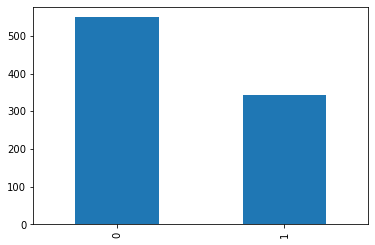

In [4]:
# Calculate the number of surviving/non-surviving passengers and display it as a bar plot.
print(df['Survived'].value_counts())

df['Survived'].value_counts().plot.bar()
plt.show()


In [5]:
# Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.
first_class = df[(df['Pclass'] == 1)]
first_class_surviving = df[(df['Survived'] == 1) & (df['Pclass'] == 1)]
first_class_surviving


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [6]:
first_class_surviving['PassengerId'].count()/first_class['PassengerId'].count()

0.6296296296296297

<Figure size 432x288 with 0 Axes>

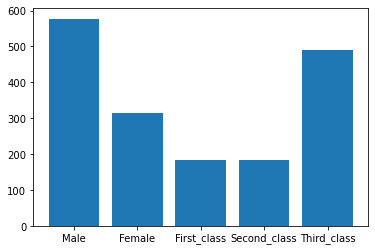

<Figure size 432x288 with 0 Axes>

In [7]:
# Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

male = df[(df['Sex'] == 'male')]
female = df[(df['Sex'] == 'female')]
second_class = first_class = df[(df['Pclass'] == 2)]
third_class = df[(df['Pclass'] == 3)]
count_male = male['PassengerId'].count()
count_female = female['PassengerId'].count()
count_first_class = first_class['PassengerId'].count()
count_second_class = second_class['PassengerId'].count()
count_third_class = third_class['PassengerId'].count()

x = ['Male', 'Female', 'First_class', 'Second_class', 'Third_class']
y = [count_male, count_female, count_first_class, count_second_class, count_third_class]

plt.bar(x,y)

plt.figure()


<AxesSubplot:xlabel='Pclass', ylabel='count'>

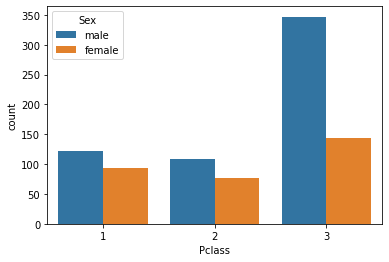

In [8]:
sns.countplot(x='Pclass', hue='Sex', data=df)

(array([ 18.,  16.,  99., 110.,  64.,  45.,  38.,  15.,  13.,   6.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <BarContainer object of 10 artists>)

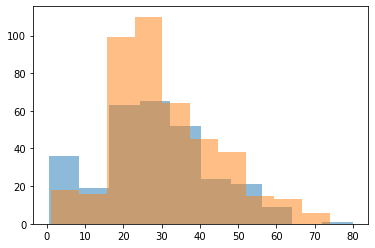

In [9]:
# Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

survived = df['Age'][df['Survived'] == 1]
not_survived = df['Age'][df['Survived'] == 0]

plt.hist(survived, alpha=0.5)
plt.hist(not_survived, alpha=0.5)


<AxesSubplot:xlabel='Age', ylabel='Count'>

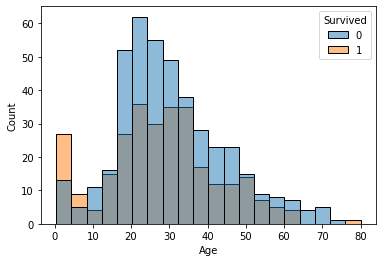

In [10]:
#with seaborn

sns.histplot(x='Age', hue='Survived', data=df)

In [11]:
#Calculate the average age for survived and drowned passengers separately.

avg_age_survived = np.mean(df['Age'][df['Survived'] == 1])
avg_age_not_survived = np.mean(df['Age'][df['Survived'] == 0])
print(avg_age_survived)
avg_age_not_survived

28.343689655172415


30.62617924528302

In [12]:
# Replace missing age values by the mean age.

#df.info()

#df['Age'].isnull().count()
df.isna().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Age'].isna().sum()
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Step 8. Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/ female.

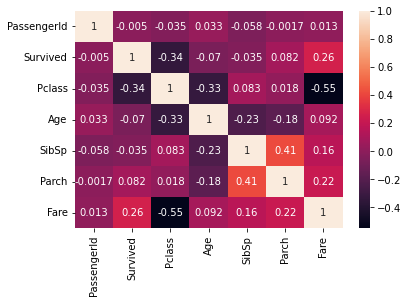

In [15]:
# Correlation matrix

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()




## Create a model with the logistic regression

In [16]:
# Train-validation split with two features

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score

X = df[["Pclass","Sex"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((668, 2), (223, 2), (668,), (223,))

In [17]:
# Feature Engineering on the Sex column

transformation = ColumnTransformer(
    [
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False), ["Sex"]),
    ]
)


In [18]:
# Fit Transform of the X_train data

X_train_FE = transformation.fit_transform(X_train)

In [19]:
# Transform of the X_test data

X_test_FE = transformation.transform(X_test)

In [20]:
transformation.transform(X_test)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [21]:
# Call of the LogisticRegression method

clf = LogisticRegression()

In [22]:
clf.fit(X_train_FE, y_train)

LogisticRegression()

## Assessing accuracy of the model

In [23]:
clf.predict_proba(X_test_FE)

array([[0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.26303073, 0.73696927],
       [0.26303073, 0.73696927],
       [0.26303073, 0.73696927],
       [0.26303073, 0.73696927],
       [0.808123  , 0.191877  ],
       [0.26303073, 0.73696927],
       [0.26303073, 0.73696927],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.26303073, 0.73696927],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.26303073, 0.73696927],
       [0.808123  , 0.191877  ],
       [0.26303073, 0.73696927],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.26303073, 0.73696927],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.808123  , 0.191877  ],
       [0.26303073, 0.73696927],
       [0.

In [24]:
clf.score(X_train_FE, y_train)

0.7874251497005988

In [25]:
clf.score(X_test_FE, y_test)

0.7847533632286996

In [26]:
ypred = clf.predict(X_test_FE) 
accuracy_score(y_test,ypred)

0.7847533632286996

In [27]:
precision = precision_score(y_test,ypred)
recall = recall_score(y_test,ypred)

print(precision_score(y_test,ypred), recall_score(y_test,ypred))

0.7411764705882353 0.7078651685393258


In [28]:
clf.predict(X_test_FE)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0])

## Make predictions with the model on the test data

In [70]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
df_test = df_test[['Pclass', 'Sex']]

In [31]:
transformation_test = ColumnTransformer(
    [
        ("encoder", OneHotEncoder(drop='first', handle_unknown="ignore", sparse=False), ["Sex"]),
    ], remainder = "passthrough"
)



In [32]:
X_train_FE = transformation_test.fit_transform(X_train)
X_test_FE = transformation.transform(X_test)

In [33]:
clf_LogReg = LogisticRegression()
clf_LogReg.fit(X_train_FE, y_train)

LogisticRegression()

In [34]:
#transformation_test.fit(X_train, y_train)

In [35]:
df_test.head()

,Pclass,Sex
0,3,male
1,3,female
2,2,male
3,3,male
4,3,female


In [36]:
X_test_FE = transformation_test.transform(df_test)
X_test_FE


array([[1., 3.],
       [0., 3.],
       [1., 2.],
       [1., 3.],
       [0., 3.],
       [1., 3.],
       [0., 3.],
       [1., 2.],
       [0., 3.],
       [1., 3.],
       [1., 3.],
       [1., 1.],
       [0., 1.],
       [1., 2.],
       [0., 1.],
       [0., 2.],
       [1., 2.],
       [1., 3.],
       [0., 3.],
       [0., 3.],
       [1., 1.],
       [1., 3.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [1., 3.],
       [0., 1.],
       [1., 3.],
       [1., 1.],
       [1., 3.],
       [1., 2.],
       [1., 2.],
       [0., 3.],
       [0., 3.],
       [1., 1.],
       [1., 3.],
       [0., 3.],
       [0., 3.],
       [1., 3.],
       [1., 3.],
       [1., 3.],
       [1., 1.],
       [1., 3.],
       [0., 2.],
       [0., 1.],
       [1., 3.],
       [1., 1.],
       [1., 3.],
       [0., 1.],
       [0., 3.],
       [1., 1.],
       [1., 2.],
       [0., 2.],
       [0., 1.],
       [1., 2.],
       [1., 3.],
       [1., 3.],
       [1., 3.],
       [1., 3.

In [37]:
predictions = clf_LogReg.predict(X_test_FE)
predictions



array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [38]:
df_test

,Pclass,Sex
0,3,male
1,3,female
2,2,male
3,3,male
4,3,female
...,...,...
413,3,male
414,1,female
415,3,male
416,3,male


In [71]:
#pd.DataFrame(data=predictions, index=df_test['PassengerId'], columns=['Survived']).to_csv('kaggle_submission.csv')


## Including more features into the model and apply pipeline

In [40]:
X = df[["Pclass","Sex", "Age", "Fare"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 4), (223, 4), (668,), (223,))

In [41]:
#Pipelines

pipeline_age = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]
)

In [42]:
# Transformers


final_transformation = ColumnTransformer(
    [
        ("transform twice Age-col", pipeline_age, ["Age"]),
        ("encoder", OneHotEncoder(drop='first', handle_unknown="ignore", sparse=False), ["Sex"]),
        ("scaler", StandardScaler(), ['Fare']),
    ]
)



In [43]:
X_train_FE = final_transformation.fit_transform(X_train)

In [44]:
X_test_FE = final_transformation.transform(X_test)

In [45]:
final_transformation.transform(X_test)

array([[ 1.71446951e-02,  1.00000000e+00, -3.28390858e-01],
       [ 1.17210870e-01,  1.00000000e+00, -4.20425490e-01],
       [-7.28928616e-01,  1.00000000e+00, -4.70362102e-01],
       [-1.80583342e+00,  0.00000000e+00,  1.59138442e-02],
       [-1.19045925e+00,  0.00000000e+00, -4.06041806e-01],
       [-2.67397987e-01,  0.00000000e+00,  9.05076442e-01],
       [ 1.71446951e-02,  0.00000000e+00, -4.73755853e-01],
       [-1.03661570e+00,  1.00000000e+00, -2.74979045e-01],
       [-1.03661570e+00,  0.00000000e+00, -4.73755853e-01],
       [-8.05850388e-01,  0.00000000e+00, -1.14342174e-01],
       [ 5.78741499e-01,  1.00000000e+00,  4.05710316e-01],
       [ 1.11719390e+00,  1.00000000e+00, -4.67937995e-01],
       [ 1.71446951e-02,  0.00000000e+00, -1.30178383e-01],
       [ 4.02890987e-02,  1.00000000e+00, -4.83937104e-01],
       [ 5.01819728e-01,  1.00000000e+00, -3.71943341e-01],
       [-1.03661570e+00,  0.00000000e+00,  1.40028144e-01],
       [ 9.63350357e-01,  1.00000000e+00

## Assessing accuracy of the model

In [46]:
clf.fit(X_train_FE, y_train)

LogisticRegression()

In [47]:
clf.predict_proba(X_test_FE)

array([[0.82655648, 0.17344352],
       [0.83560125, 0.16439875],
       [0.82557408, 0.17442592],
       [0.23797189, 0.76202811],
       [0.29945148, 0.70054852],
       [0.1837997 , 0.8162003 ],
       [0.33878771, 0.66121229],
       [0.80321925, 0.19678075],
       [0.31151751, 0.68848249],
       [0.27461129, 0.72538871],
       [0.76991915, 0.23008085],
       [0.85458402, 0.14541598],
       [0.29625628, 0.70374372],
       [0.83930988, 0.16069012],
       [0.838012  , 0.161988  ],
       [0.24157745, 0.75842255],
       [0.7789035 , 0.2210965 ],
       [0.33859098, 0.66140902],
       [0.82661525, 0.17338475],
       [0.78764938, 0.21235062],
       [0.83078581, 0.16921419],
       [0.81382846, 0.18617154],
       [0.31713665, 0.68286335],
       [0.82348815, 0.17651185],
       [0.82773907, 0.17226093],
       [0.77596151, 0.22403849],
       [0.82003022, 0.17996978],
       [0.8317569 , 0.1682431 ],
       [0.76635257, 0.23364743],
       [0.34117777, 0.65882223],
       [0.

In [48]:
# Calculate the train accuracy

clf.score(X_train_FE, y_train)

0.7874251497005988

In [49]:
# Calculate the validation accuracy

clf.score(X_test_FE, y_test)

0.7713004484304933

In [50]:
ypred = clf.predict(X_test_FE)
ypred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0])

In [51]:
accuracy_score(y_test, ypred)

0.7713004484304933

In [52]:
X = df[["Pclass","Sex", "Age", "Fare", "Embarked"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 5), (223, 5), (668,), (223,))

In [53]:
#Pipelines

pipeline_age = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]
)

In [54]:
# Transformers


final_transformation = ColumnTransformer(
    [
        ("transform twice Age-col2", pipeline_age, ["Age"]),
        ("encoder2", OneHotEncoder(drop='first', handle_unknown="ignore", sparse=False), ["Sex"]),
        ("encoder3", OneHotEncoder(drop='first', handle_unknown="ignore", sparse=False), ["Embarked"]),
        ("scaler2", StandardScaler(), ['Fare']),
    ]
)



In [55]:
X_train_FE = final_transformation.fit_transform(X_train)

In [56]:
X_test_FE = final_transformation.transform(X_test)

In [57]:
final_transformation.transform(X_test)

array([[ 0.0171447 ,  1.        ,  0.        ,  0.        ,  0.        ,
        -0.32839086],
       [ 0.11721087,  1.        ,  0.        ,  1.        ,  0.        ,
        -0.42042549],
       [-0.72892862,  1.        ,  0.        ,  1.        ,  0.        ,
        -0.4703621 ],
       ...,
       [ 0.0171447 ,  1.        ,  0.        ,  1.        ,  0.        ,
        -0.47092837],
       [-0.42124153,  0.        ,  0.        ,  1.        ,  0.        ,
        -0.37194334],
       [-0.88277216,  1.        ,  0.        ,  1.        ,  0.        ,
        -0.23207234]])

In [58]:
clf.fit(X_train_FE, y_train)

LogisticRegression()

In [59]:
clf.predict_proba(X_test_FE)

array([[0.73668979, 0.26331021],
       [0.84892942, 0.15107058],
       [0.83914459, 0.16085541],
       [0.26151034, 0.73848966],
       [0.19971676, 0.80028324],
       [0.21224487, 0.78775513],
       [0.34826887, 0.65173113],
       [0.8198864 , 0.1801136 ],
       [0.32058745, 0.67941255],
       [0.29871614, 0.70128386],
       [0.79543697, 0.20456303],
       [0.86629692, 0.13370308],
       [0.32122538, 0.67877462],
       [0.75234427, 0.24765573],
       [0.85155284, 0.14844716],
       [0.26681983, 0.73318017],
       [0.80358316, 0.19641684],
       [0.34809052, 0.65190948],
       [0.84092063, 0.15907937],
       [0.81149458, 0.18850542],
       [0.84402615, 0.15597385],
       [0.83120847, 0.16879153],
       [0.33837301, 0.66162699],
       [0.83739578, 0.16260422],
       [0.84220458, 0.15779542],
       [0.79622271, 0.20377729],
       [0.73078361, 0.26921639],
       [0.84572039, 0.15427961],
       [0.78723842, 0.21276158],
       [0.36318464, 0.63681536],
       [0.

In [60]:
# Calculate the train accuracy

clf.score(X_train_FE, y_train)

0.7844311377245509

In [61]:
# Calculate the validation accuracy

clf.score(X_test_FE, y_test)

0.7713004484304933

In [62]:
ypred = clf.predict(X_test_FE)
ypred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0])

In [63]:
accuracy_score(y_test, ypred)

0.7713004484304933

In [64]:
#No overfitting here since train and test are very close

## Random Forest

### Without categorical variables

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X = df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df["Survived"]

train, test = train_test_split(df)


Xtrain = train[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
ytrain = train['Survived']


rf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf.fit(Xtrain, ytrain)

importance=rf.feature_importances_


list(zip(importance, Xtrain.columns))

[(0.07381684378198047, 'PassengerId'),
 (0.3216212761181624, 'Pclass'),
 (0.10267792064363634, 'Age'),
 (0.04542963145602844, 'SibSp'),
 (0.1124969955431974, 'Parch'),
 (0.34395733245699495, 'Fare')]

### With transformed categorical variables

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df["Survived"]

train, test = train_test_split(df)


Xtrain = train[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
ytrain = train['Survived']

Xtest = test[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
ytest = test['Survived']

# Transform categorical variables into numeric ones

final_transformation = ColumnTransformer(
    [
        ("transform twice Age-col3", pipeline_age, ["Age"]),
        ("encoder3", OneHotEncoder(drop='first', handle_unknown="ignore", sparse=False), ["Sex"]),
        ("encoder4", OneHotEncoder(drop='first', handle_unknown="ignore", sparse=False), ["Embarked"]),
        ("scaler3", StandardScaler(), ['Fare']),
    ]
)


X_train_FE = final_transformation.fit_transform(Xtrain)

X_test_FE = final_transformation.transform(Xtest)

rf = RandomForestClassifier(n_estimators=10, max_depth=2)
rf.fit(X_train_FE, ytrain)

importance=rf.feature_importances_


list(zip(importance, Xtrain.columns))

[(0.27607612075134796, 'PassengerId'),
 (0.4150509418424239, 'Pclass'),
 (0.031224087746616776, 'Sex'),
 (0.0833525568391839, 'Age'),
 (0.010760857084869797, 'SibSp'),
 (0.1835354357355577, 'Parch')]

In [67]:
rf.score(X_train_FE, ytrain)

0.7934131736526946

In [68]:
rf.score(X_test_FE, ytest)

0.820627802690583